# Empirical project 2 (Taller 4)- Working in Python

## Getting started in Python

Taller 4- Doing economics
Jean Gonzalez
Francisco Sarmiento
Juliana López
Marzo 2025

Read the 'Getting Started in Python' page for help and advice on setting up a Python session to work with. Remember, you can run any page from this book as a *notebook* by downloading the relevant file from this [repository](https://github.com/aeturrell/core_python) and running it on your own computer. Alternatively, you can run pages online in your browser over at [Binder](https://mybinder.org/v2/gh/aeturrell/core_python/HEAD).


### Preliminary settings


Let's import the packages we'll need and also configure the settings we want:

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pingouin as pg
from lets_plot import *
# Import files into colab
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

LetsPlot.setup_html(no_js=True)


### You don't need to use these settings yourself
### â€” they are just here to make the book look nicer!
# Set the plot style for prettier charts:
plt.style.use(
    "https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt"
)

Saving base_juego_taller4.xlsx to base_juego_taller4.xlsx
User uploaded file "base_juego_taller4.xlsx" with length 12388 bytes


In [ ]:
# Si no tenemos algunos paquetes...
!pip install pingouin
!pip install lets_plot

  Using cached pingouin-0.5.5-py3-none-any.whl.metadata (19 kB)
  Using cached pandas_flavor-0.6.0-py3-none-any.whl.metadata (6.3 kB)
Using cached pingouin-0.5.5-py3-none-any.whl (204 kB)
Using cached pandas_flavor-0.6.0-py3-none-any.whl (7.2 kB)


## Part 2.1 Collecting data by playing a public goods game

### P2.1.1
 *Make a line chart with average contribution as the vertical axis variable, and period (from 1 to 10) on the horizontal axis. Describe how average contributions have changed over the course of the game.*


Use the data from your own experiment to answer Question 1. As an example, we will use the data for the first three cities of the dataset that will be introduced in Part 2.2.

In [ ]:
# Create a dictionary with the data in
data = {
    "Copenhagen": [14.1, 14.1, 13.7, 12.9, 12.3, 11.7, 10.8, 10.6, 9.8, 5.3],
    "Dniprop": [11.0, 12.6, 12.1, 11.2, 11.3, 10.5, 9.5, 10.3, 9.0, 8.7],
    "Minsk": [12.8, 12.3, 12.6, 12.3, 11.8, 9.9, 9.9, 8.4, 8.3, 6.9],
}


df = pd.DataFrame.from_dict(data)
df.head()


,Copenhagen,Dniprop,Minsk
0,14.1,11.0,12.8
1,14.1,12.6,12.3
2,13.7,12.1,12.6
3,12.9,11.2,12.3
4,12.3,11.3,11.8


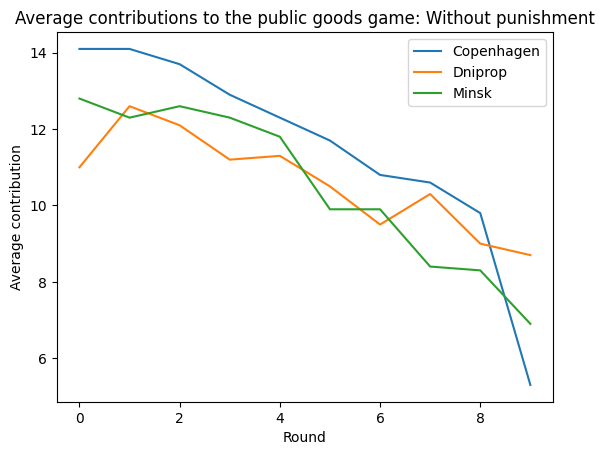

In [ ]:
# Plot the data
fig, ax = plt.subplots()
df.plot(ax=ax)
ax.set_title("Average contributions to the public goods game: Without punishment")
ax.set_ylabel("Average contribution")
ax.set_xlabel("Round");

Now we are going to make the same exercise but with the data of the experiment that we did in class.

In [ ]:
data_np = pd.read_excel(
    "base_juego_taller4.xlsx",
    usecols="A:M",  # Columnas A hasta M
    header=0,       # La primera fila contiene los nombres de las columnas
    index_col="Round",  # Usar "Round" como índice
)
data_n = data_np.iloc[:12, :].copy()  # Toma las primeras 11 filas
data_p = data_np.iloc[:13, :].copy()  # Toma las siguientes 11 filas
data_np.head()


,Player 1​,Player 2​,Player 3,Player 4,Player 5,Player 6,Player 7,Player 8,Player 9,Player 10,Player 11,Player 12
Round,,,,,,,,,,,,
1,100,70,42,35,35,5,0,1,25,30,50,50
2,0,10,50,15,20,50,0,0,10,45,20,50
3,5,5,21,4,5,10,0,1,1,50,10,50
4,0,0,34,0,1,50,0,2,0,25,20,50
5,1,1,50,50,0,10,0,1,1,10,10,50


Now we need to plot the data. Note that, with data in 'wide' format (one column per city) and with an index, simply calling `.plot` on a **pandas** dataframe will create a **matplotlib** line chart. We could also use the **lets-plot** package to make this kind of chart, but it expects data in 'tidy' or 'long' formatâ€”and for that, we would have to reshape the data so that the city names were values in a single column called 'city' or similar. Let's just use **matplotlib** for now.

### P2.1.2
*Compare your line chart with Figure 3 of Herrmann et al. (2008).1 Comment on any similarities or differences between the results (for example, the amount contributed at the start and end, or the change in average contributions over the course of the game).*

**RESPUESTA**



Saving base_juego_taller4.xlsx to base_juego_taller4 (1).xlsx


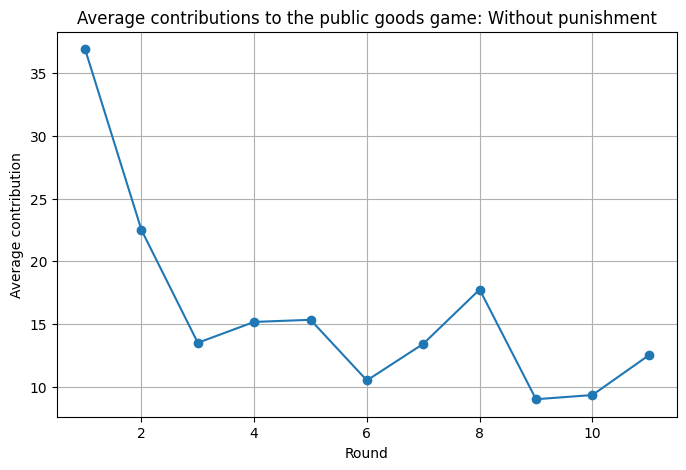

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Subir el archivo
uploaded = files.upload()

# Obtener el nombre del archivo subido
file_name = list(uploaded.keys())[0]

# Cargar el archivo en un DataFrame
df = pd.read_excel(file_name)

# Calcular el promedio por ronda
mean_values = df.groupby("Round").mean()

# Plotear los datos
plt.figure(figsize=(8, 5))  # Tamaño del gráfico
plt.plot(mean_values.index, mean_values.mean(axis=1), marker='o', linestyle='-')  # Línea con puntos
plt.title("Average contributions to the public goods game: Without punishment")
plt.xlabel("Round")
plt.ylabel("Average contribution")
plt.grid(True)  # Agregar cuadrícula
plt.show()  # Mostrar la gráfica

RESPUESTA:

El primer gráfico muestra que, sin castigo, las contribuciones caen drásticamente al inicio y se mantienen bajas con fluctuaciones, evidenciando una falta de incentivos para cooperar. En contraste, el segundo gráfico, que compara distintas ciudades, muestra contribuciones más estables e incluso ascendentes en algunos casos, sugiriendo que factores como la cultura o normas sociales pueden influir en la cooperación. Además, mientras que el primer gráfico refleja una variabilidad abrupta, el segundo presenta diferencias más estructuradas entre grupos, indicando que en algunas sociedades la cooperación se mantiene alta incluso sin castigo.

### P2.1.3

*Can you think of any reasons why your results are similar to (or different from) those in Figure 3? You may find it helpful to read the ‘Experiments’ section of the Herrmann et al. (2008) study for a more detailed description of how the experiments were conducted.*

RESPUESTA:

En el experimento del paper Herrmann et al. (2008) podemos ver como el enfoque está en el hecho de si hay castigo o no en los diferentes tipos de experimentos. En cambio, en el que hicimos en clase no indicaba ninguna clase de castigo en los intentos o en la forma en como se iba a contribuir. También, la cantidad de dinero expresada que se daba al inicio de cada ronda era diferente, haciendo un cambio en la forma de tomar la desición.

Con esto, podemos decir que en general las condiciones en los experimentos fueron diferentes, y entendiendo que un cambio mínimo en la forma en como se hacen los experimentos puede cambiar de gran forma la toma de desiciones de los agentes, entendemos que la gran cantidad de diferencias entre los experimento genera cambios relevantes en los resultados de estos.

## Part 2.2 Describing the data

### P2.2.1 Using the data for Figures 2A and 3 of Herrmann et al. (2008):



*   Calculate the mean contribution in each period (row) separately for both experimentes
*   Plot a line chart of mean contribution on the vertical axis and time period (from 1 to 10) on the horizontal axis (with a separate line for each experiment). Make sure the lines in the legend are clearly labelled according to the experiment (with punishment or without punishment).
*   Describe any differences and similarities you see in the mean contribution over time in both experiments.

Both the tables you need are in a single Excel worksheet. Note down the cell ranges of each table, in this case A2:Q12 for the without punishment data and A16:Q26 for the punishment data. We will use this range information to import the data into two dataframes (`data_n` and `data_p` respectively).

How to use data? In Colab, check this: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=vz-jH8T_Uk2c

In [ ]:
# Import files into colab
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving doing-economics-datafile-working-in-excel-project-2 (1).xlsx to doing-economics-datafile-working-in-excel-project-2 (1).xlsx
User uploaded file "doing-economics-datafile-working-in-excel-project-2 (1).xlsx" with length 13464 bytes


In [ ]:
data_np = pd.read_excel(
    "doing-economics-datafile-working-in-excel-project-2 (1).xlsx",
    usecols="A:Q",  # Columnas A hasta M
    header=1,       # La primera fila contiene los nombres de las columnas
    index_col="Period",  # Usar "Round" como índice
)
data_n = data_np.iloc[:10, :].copy()
data_p = data_np.iloc[14:24, :].copy()

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


We can check the datatypes of the data we just read in using `data_n.info()` (you can do the same for `data_p`).

In [ ]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Copenhagen       10 non-null     object
 1   Dnipropetrovs’k  10 non-null     object
 2   Minsk            10 non-null     object
 3   St. Gallen       10 non-null     object
 4   Muscat           10 non-null     object
 5   Samara           10 non-null     object
 6   Zurich           10 non-null     object
 7   Boston           10 non-null     object
 8   Bonn             10 non-null     object
 9   Chengdu          10 non-null     object
 10  Seoul            10 non-null     object
 11  Riyadh           10 non-null     object
 12  Nottingham       10 non-null     object
 13  Athens           10 non-null     object
 14  Istanbul         10 non-null     object
 15  Melbourne        10 non-null     object
dtypes: object(16)
memory usage: 1.3+ KB


We have continuous real numbers in the columns of `data_n` and `data_p` here, so we'll set the datatypes to be `double`, which is a datatype used for continuous real numbers.


In [ ]:
data_n = data_n.astype("double")
data_p = data_p.astype("double")
data_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Copenhagen       10 non-null     float64
 1   Dnipropetrovs’k  10 non-null     float64
 2   Minsk            10 non-null     float64
 3   St. Gallen       10 non-null     float64
 4   Muscat           10 non-null     float64
 5   Samara           10 non-null     float64
 6   Zurich           10 non-null     float64
 7   Boston           10 non-null     float64
 8   Bonn             10 non-null     float64
 9   Chengdu          10 non-null     float64
 10  Seoul            10 non-null     float64
 11  Riyadh           10 non-null     float64
 12  Nottingham       10 non-null     float64
 13  Athens           10 non-null     float64
 14  Istanbul         10 non-null     float64
 15  Melbourne        10 non-null     float64
dtypes: float64(16)
memory usage: 1.3+ KB


In [ ]:
data_n

,Copenhagen,Dnipropetrovs’k,Minsk,St. Gallen,Muscat,Samara,Zurich,Boston,Bonn,Chengdu,Seoul,Riyadh,Nottingham,Athens,Istanbul,Melbourne
Period,,,,,,,,,,,,,,,,
1,14.102941,10.954545,12.79410,13.687500,9.53846,10.84210,11.08330,12.96430,10.850000,10.0000,8.250000,7.958333,10.928571,8.136364,8.937500,8.225
2,14.132353,12.636363,12.33820,12.802067,10.98080,11.50000,12.16670,12.71430,10.800000,9.9625,9.142857,7.729167,10.535714,6.272727,9.015625,7.325
3,13.720588,12.068182,12.58820,12.354184,11.51920,11.72370,10.78130,12.71430,11.516667,10.2250,9.892857,7.187500,9.125000,6.409091,8.437500,6.250
4,12.897059,11.181818,12.26470,10.604183,10.30770,11.30920,10.63540,11.35710,10.700000,10.0125,9.666667,7.875000,8.982143,6.318182,6.921875,5.975
5,12.338235,11.272727,11.82350,10.989583,9.82692,10.33550,8.52083,11.03570,10.700000,9.1000,9.011905,7.895833,8.071428,6.727272,5.812500,5.425
6,11.676471,10.477273,9.88235,10.708317,10.28850,10.20390,7.10417,10.14290,9.416667,7.7000,8.559524,7.791667,5.410714,6.318182,4.546875,5.050
7,10.779412,9.454545,9.88235,10.145817,10.19230,8.71710,7.41667,9.05357,7.683333,6.6375,7.892857,8.145834,5.339286,5.863636,3.921875,4.275
8,10.632353,10.340909,8.42647,9.510415,10.11540,8.23684,7.31250,6.17857,8.566667,6.0125,7.130952,8.291667,4.660714,6.250000,3.156250,3.200
9,9.764706,9.022727,8.26471,7.374998,9.55769,8.17763,6.21875,4.16071,7.400000,4.5125,5.857143,7.541667,4.053571,5.909091,2.171875,2.300


We calculate the mean using two different methods, to illustrate that there are usually many ways of achieving the same thing. We apply the first method on `data_n`, which uses the built-in `.mean()` function to calculate the average separately over each column except the first. We use the second method (the `agg` function) on `data_p`.

As the name suggests, the `agg` function applies an aggregation function (the mean function in this case) to all rows or columns in a dataframe. The second input, `axis=1`, applies the specified function to all rows in `data_p`, so we are taking the average over cities for each period.

In [ ]:
mean_n_c = data_n.mean(axis=1)
mean_p_c = data_p.agg(np.mean, axis=1)
mean_p_c

<ipython-input-39-4d2577de781f>:2: FutureWarning: The provided callable <function mean at 0x786df516eb60> is currently using DataFrame.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_p_c = data_p.agg(np.mean, axis=1)


,0
Period,
1,10.638759
2,11.954794
3,12.664337
4,12.966662
5,13.331636
6,13.502236
7,13.574680
8,13.635535
9,13.569548


Typing `axis=0` would have calculated column means instead, i.e. it would have averaged over periods to produce one value per city (run this code to see for yourself). Type `help(pd.DataFrame.agg)` in your interactive Python window for more details, or see Python walk-through 2.5 for further practice.


####Plot the mean contribution####


Now we will produce a line chart showing the mean contributions.

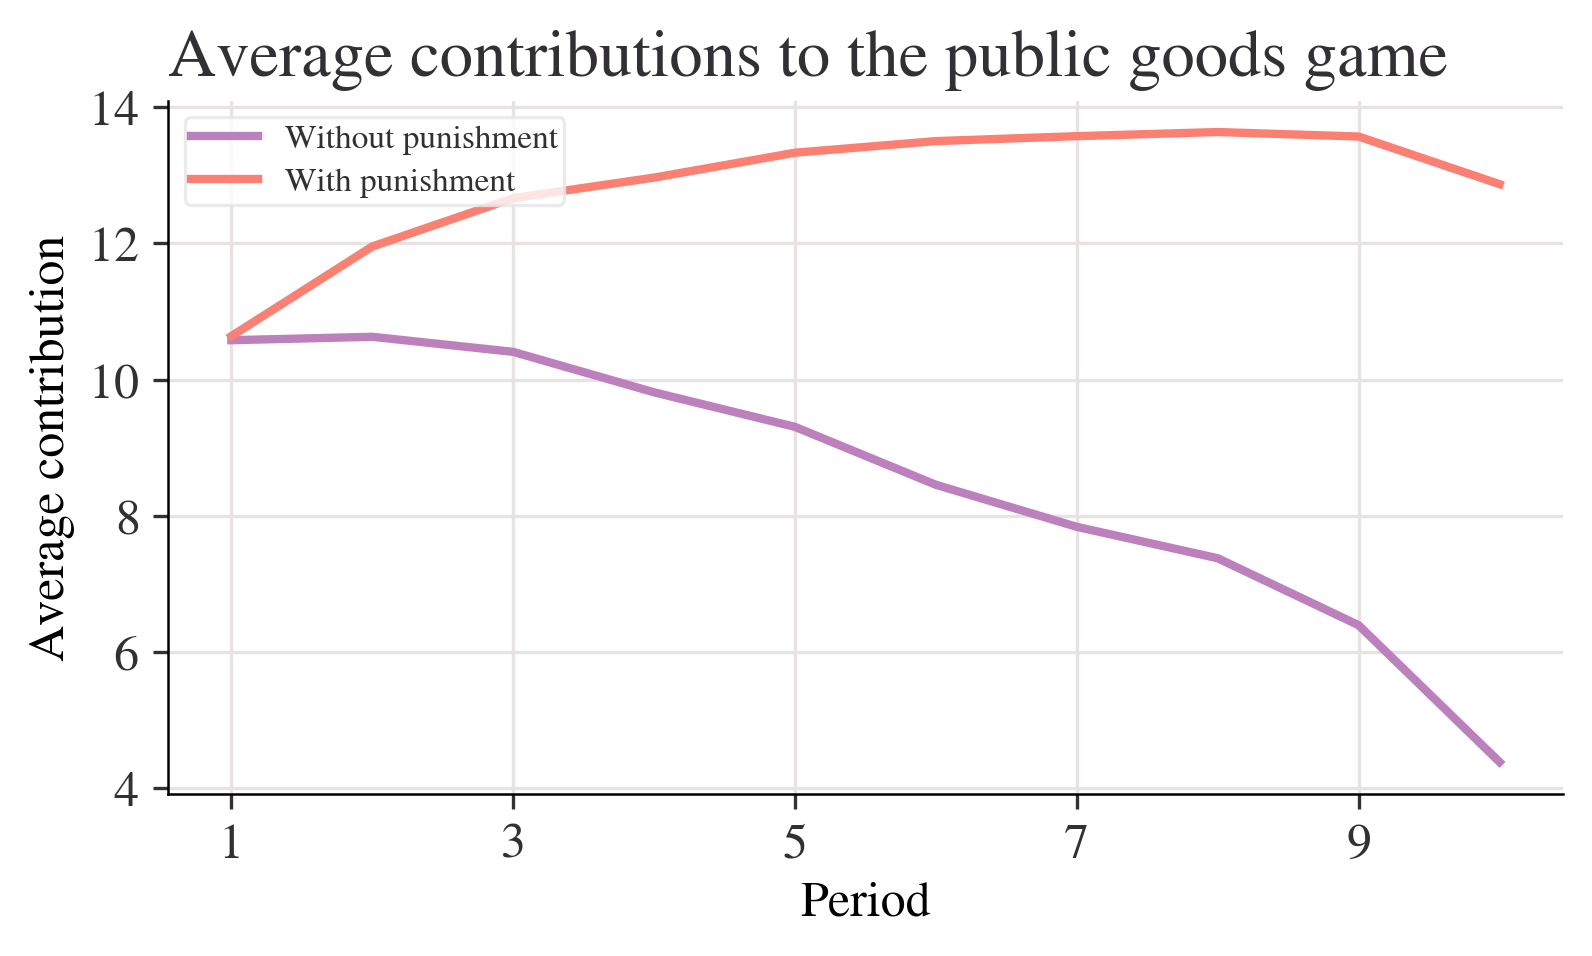

In [ ]:
fig, ax = plt.subplots()
mean_n_c.plot(ax=ax, label="Without punishment")
mean_p_c.plot(ax=ax, label="With punishment")
ax.set_title("Average contributions to the public goods game")
ax.set_ylabel("Average contribution")
ax.legend();

La contribución promedio disminuye con el tiempo cuando no hay castigo, mientras que con castigo se mantiene alta y estable. Esto sugiere que la posibilidad de castigo incentiva mayores contribuciones en el juego de bienes públicos.


### P2.2.2

Instead of looking at all periods, we can focus on contributions in the first and last period. Plot a column chart showing the mean contribution in the first and last period for both experiments.










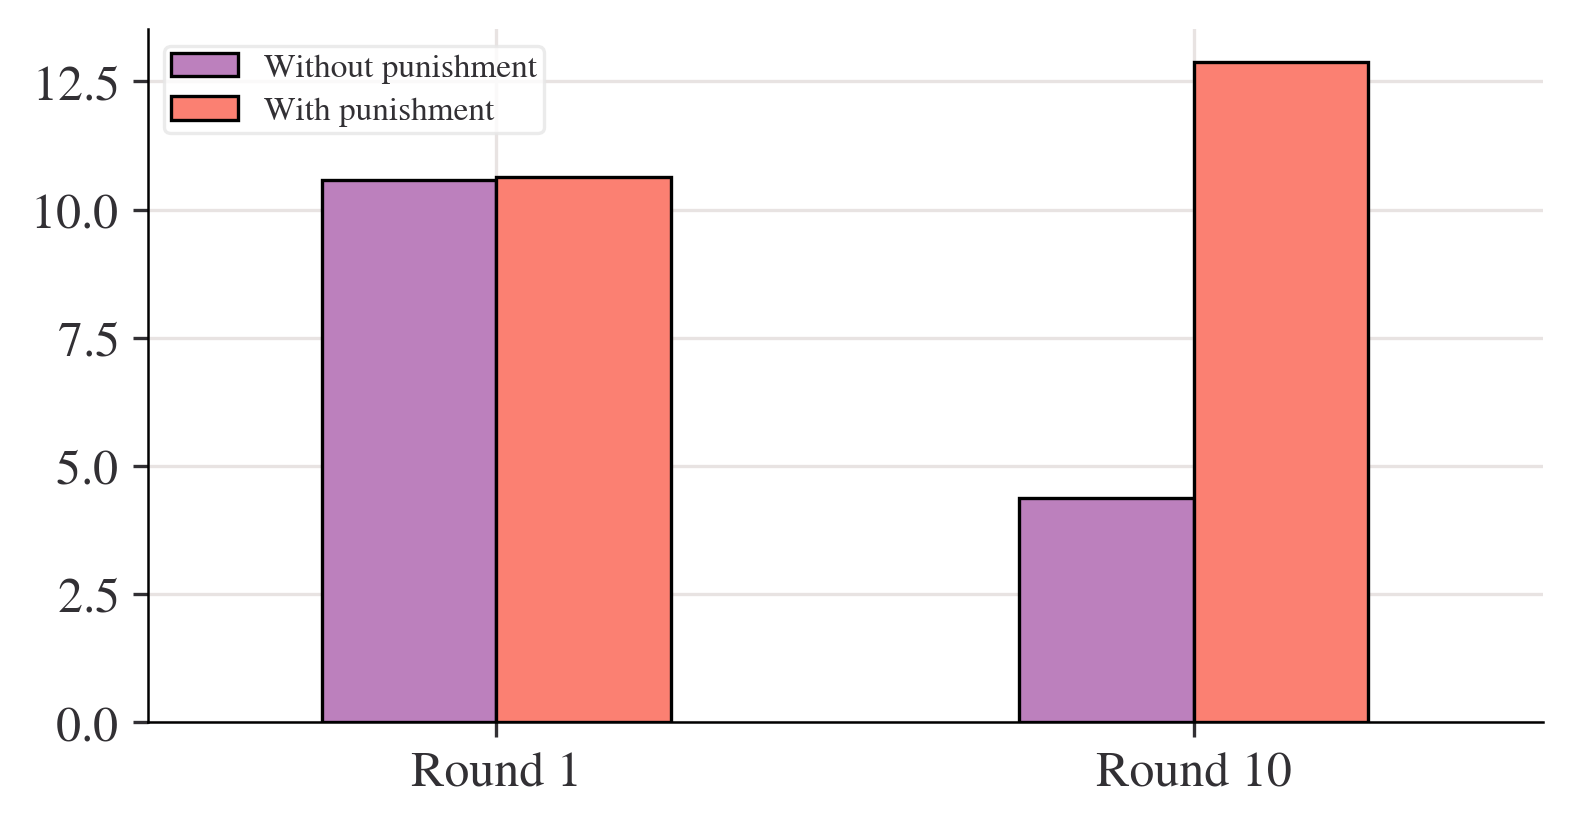

In [ ]:
# Create new dataframe with bars in
compare_grps = pd.DataFrame(
    [mean_n_c.loc[[1, 10]], mean_p_c.loc[[1, 10]]],
    index=["Without punishment", "With punishment"],
)
# Rename columns to have 'round' in them
compare_grps.columns = ["Round " + str(i) for i in compare_grps.columns]
# Swap the column and index variables around with the transpose function, ready for plotting (.T is transpose)
compare_grps = compare_grps.T
# Make a bar chart
compare_grps.plot.bar(rot=0);

### P2.2.3
Using the data for Figures 2A and 3 of Herrmann et al. (2008)

*   Calculate the standard deviation for Periods 1 and 10 separately, for both experiments. Does the rule of thumb apply? (In other words, are most values within two standard deviations of the mean?)
*   As shown in Figure 2.3, the mean contribution for both experiments was 10.6 in Period 1. With reference to your standard deviation calculations, explain whether this means that the two sets of data are the same.


In [ ]:
n_c_without = data_n.loc[[1, 10]].agg(["std", "var", "mean"], axis=1)  # Without Punishment, rounds 1 and 10
n_c_with = data_p.loc[[1, 10]].agg(["std", "var", "mean"], axis=1)  # With Punishment, rounds 1 and 10

# Mostrar resultados
print("Without Punishment (Rounds 1 & 10):\n", n_c_without)
print("\nWith Punishment (Rounds 1 & 10):\n", n_c_with)

Without Punishment (Rounds 1 & 10):
              std       var       mean
Period                               
1       2.020724  4.083325  10.578313
10      2.187126  4.783520   4.383769

With Punishment (Rounds 1 & 10):
              std        var       mean
Period                                
1       3.207258  10.286506  10.638759
10      3.898020  15.194557  12.869879


Contribution to public goods game without punishment

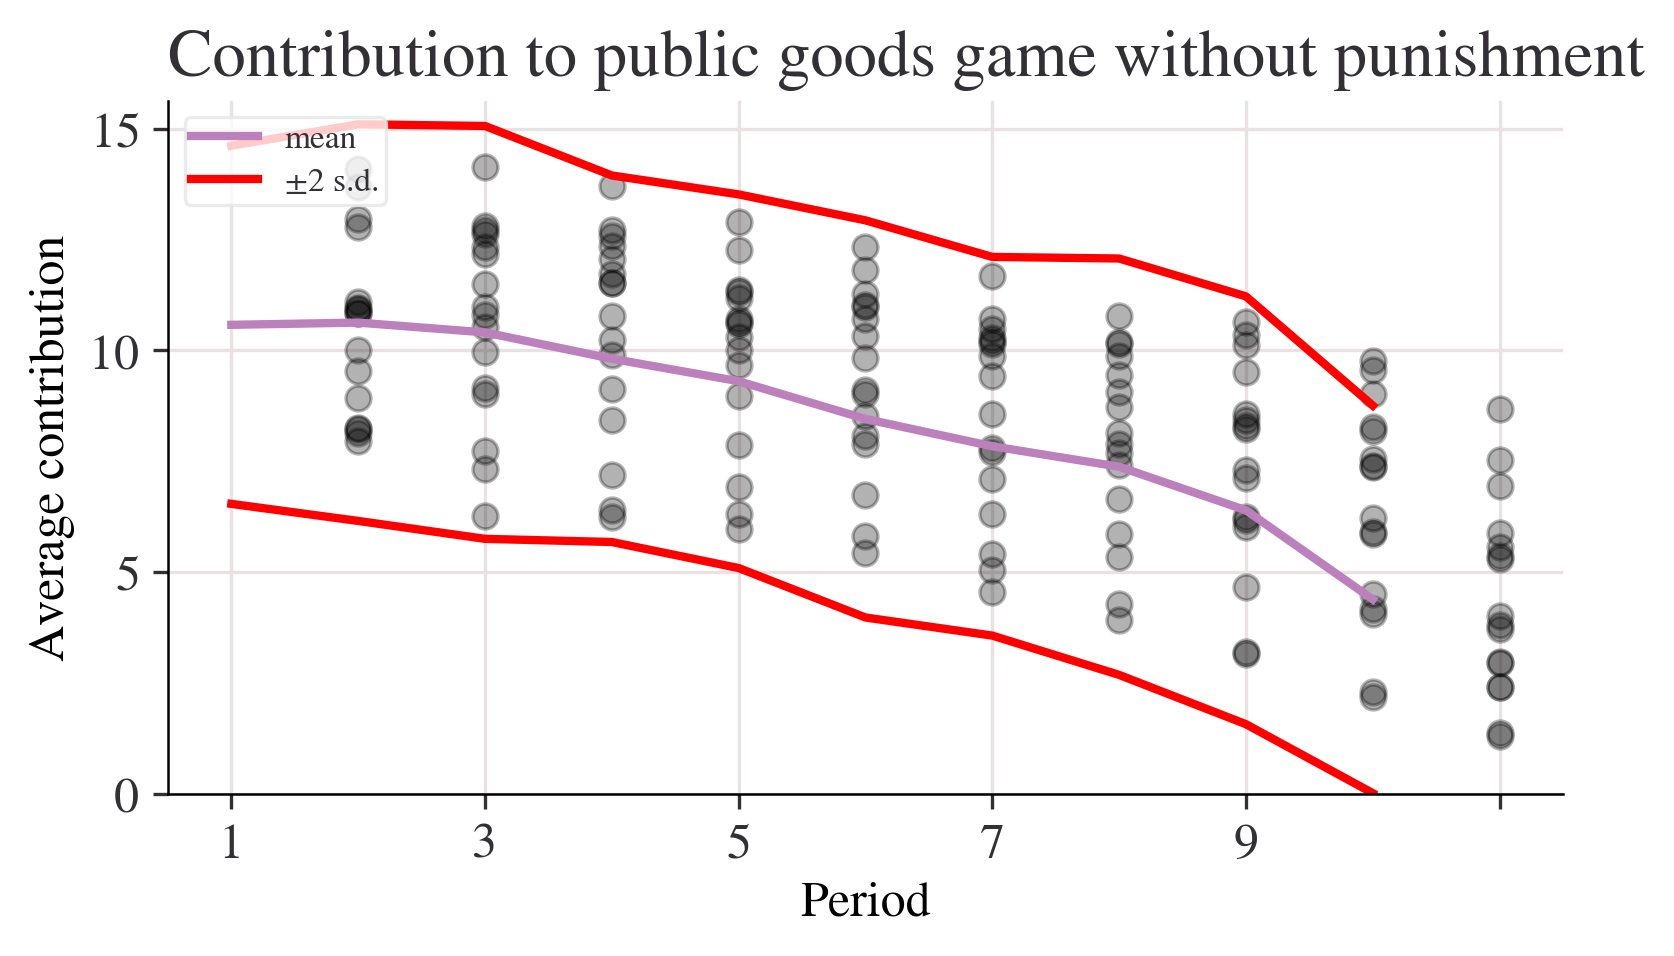

In [ ]:
fig, ax = plt.subplots()
n_c["mean"].plot(ax=ax, label="mean")
# mean + 2 standard deviations
(n_c["mean"] + 2 * n_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="±2 s.d.")
# mean - 2 standard deviations
(n_c["mean"] - 2 * n_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="")
for i in range(len(data_n.columns)):
    ax.scatter(x=data_n.index, y=data_n.iloc[:, i], color="k", alpha=0.3)
ax.legend()
ax.set_ylabel("Average contribution")
ax.set_title("Contribution to public goods game without punishment")
plt.show();

Contribution to public goods game with punishment.

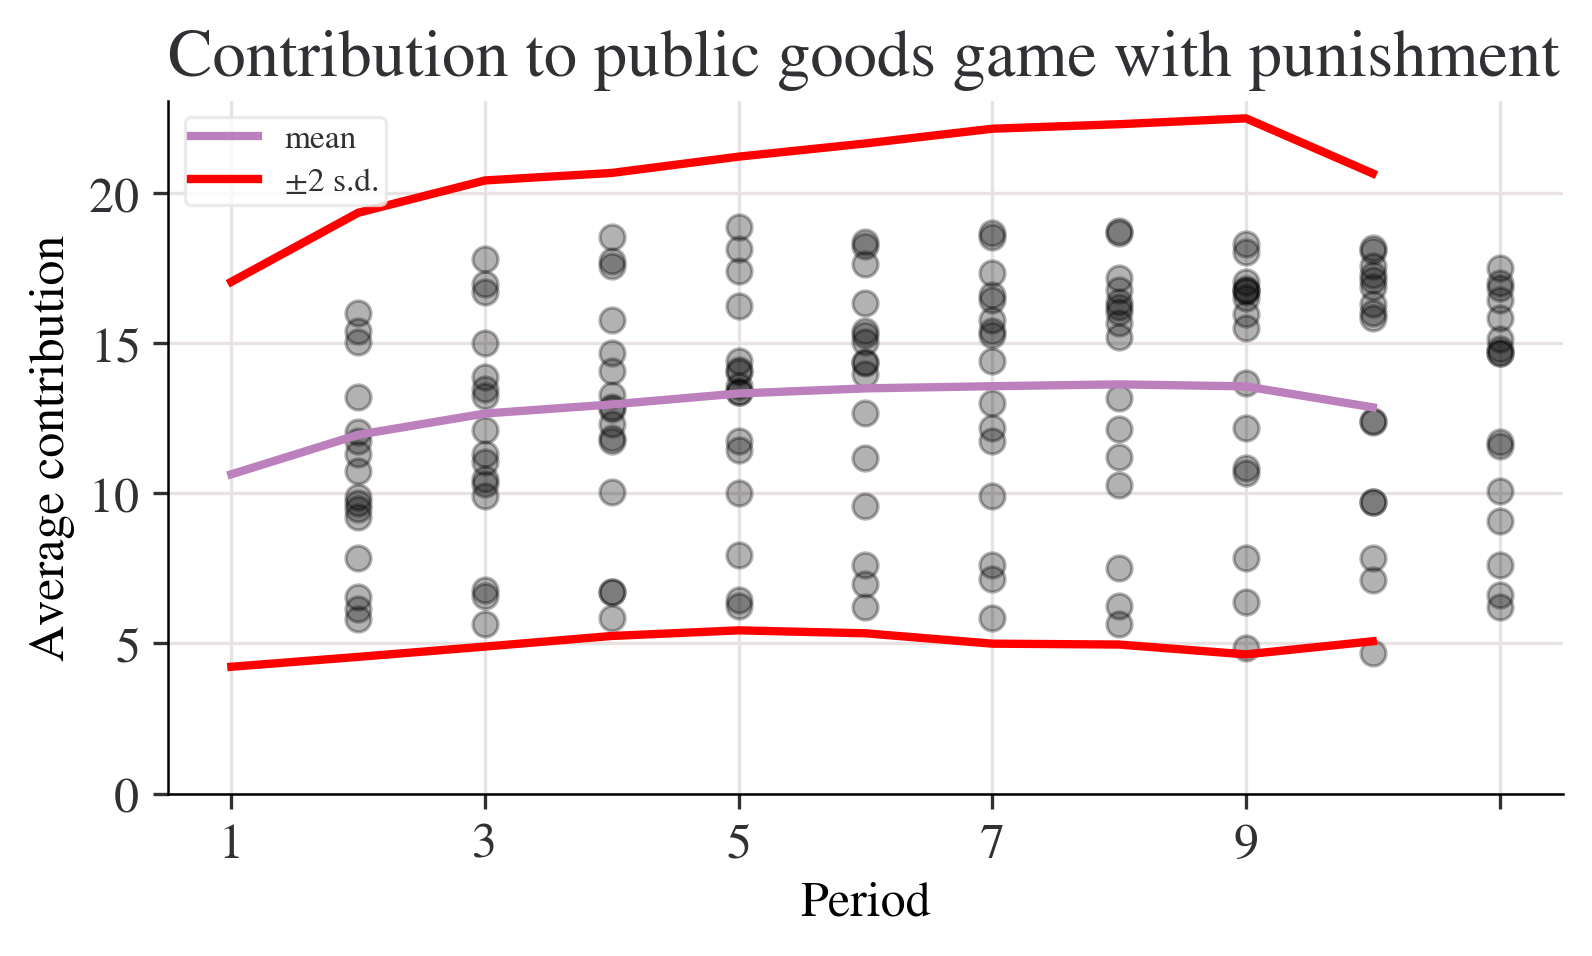

In [ ]:
fig, ax = plt.subplots()
p_c["mean"].plot(ax=ax, label="mean")
# mean + 2 sd
(p_c["mean"] + 2 * p_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="±2 s.d.")
# mean - 2 sd
(p_c["mean"] - 2 * p_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="")
for i in range(len(data_p.columns)):
    ax.scatter(x=data_p.index, y=data_p.iloc[:, i], color="k", alpha=0.3)
ax.legend()
ax.set_ylabel("Average contribution")
ax.set_title("Contribution to public goods game with punishment")
plt.show();

En el Período 1, la media es 10.6 en ambos experimentos, pero la desviación estándar es mayor en el experimento con castigo (3.21) que en el sin castigo (2.02). En el Período 10, las diferencias son aún más notables. Aunque los promedios sean iguales en la primera ronda, la mayor variabilidad en el experimento con castigo indica que los datos no son exactamente los mismos.

La regla del pulgar establece que la mayoría de los valores deben estar dentro de dos desviaciones estándar de la media. En ambos experimentos, los intervalos calculados abarcan un rango amplio que contiene la mayoría de los valores observados. Por lo tanto, sí se cumple la regla del pulgar en ambos casos, aunque la dispersión sea mayor en el experimento con castigo.


### P2.2.4
Calculate the maximum and minimum value for Periods 1 and 10 separately, for both experiments.




In [ ]:
# Calcular el máximo y mínimo para los periodos 1 y 10 (sin castigo)
max_min_without = data_n.loc[[1, 10]].agg(["max", "min"], axis=1)

# Calcular el máximo y mínimo para los periodos 1 y 10 (con castigo)
max_min_with = data_p.loc[[1, 10]].agg(["max", "min"], axis=1)

# Mostrar resultados
print("Without Punishment (Rounds 1 & 10):\n", max_min_without)
print("\nWith Punishment (Rounds 1 & 10):\n", max_min_with)


Without Punishment (Rounds 1 & 10):
        max  min
Round          
1      100    0
10      50    0

With Punishment (Rounds 1 & 10):
        max  min
Round          
1      100    0
10      50    0


### P2.2.5
A concise way to describe the data is in a summary table. With just four numbers (mean, standard deviation, minimum value, maximum value), we can get a general idea of what the data looks like.



*   Create a table of summary statistics that displays mean, variance, standard deviation, minimum, maximum and range for Periods 1 and 10 and for both experiments.
*   Comment on any similarities and differences in the distributions, both across time and across experiments.

In [ ]:
# Calcular estadísticas resumidas
summary_stats_n = data_n.loc[[1, 10]].agg(["mean", "var", "std", "min", "max"], axis=1)  # Without Punishment
summary_stats_p = data_p.loc[[1, 10]].agg(["mean", "var", "std", "min", "max"], axis=1)  # With Punishment

# Verificar que 'min' y 'max' existen antes de calcular el rango
if "min" in summary_stats_n.index and "max" in summary_stats_n.index:
    summary_stats_n.loc["range"] = summary_stats_n.loc["max"] - summary_stats_n.loc["min"]

if "min" in summary_stats_p.index and "max" in summary_stats_p.index:
    summary_stats_p.loc["range"] = summary_stats_p.loc["max"] - summary_stats_p.loc["min"]

# Mostrar resultados
print("Summary Statistics - Without Punishment (Rounds 1 & 10):\n", summary_stats_n)
print("\nSummary Statistics - With Punishment (Rounds 1 & 10):\n", summary_stats_p)


Summary Statistics - Without Punishment (Rounds 1 & 10):
             mean         var        std  min    max
Round                                              
1      36.916667  846.446970  29.093762  0.0  100.0
10      9.333333  368.969697  19.208584  0.0   50.0

Summary Statistics - With Punishment (Rounds 1 & 10):
             mean         var        std  min    max
Round                                              
1      36.916667  846.446970  29.093762  0.0  100.0
10      9.333333  368.969697  19.208584  0.0   50.0


## Part 2.3 How did changig the rules of the game affect behaviour?

### P2.3.1
You can conduct another experiment to understand why we might see differences in behaviour that are due to chance.

First, flip a coin six times, using one hand only, and record the results (for example, Heads, Heads, Tails, etc.). Then, using the same hand, flip a coin six times and record the results again.

Compare the outcomes from Question 1(a). Did you get the same number of heads in both cases? Even if you did, was the sequence of the outcomes (for example, Heads, Tails, Tails …) the same in both cases?

RESPUESTA:

Este experimento muestra cómo el azar puede influir en los resultados. Al lanzar la moneda seis veces con una mano y repetir el proceso, si es posible que el número de caras obtenidas en cada ronda no sea el mismo. Esto ocurre porque cada lanzamiento es un evento independiente y no está condicionado por los anteriores.

Incluso si el número de caras coincidiera en ambas rondas, la secuencia específica de resultados (por ejemplo, Cara, Sello, Sello…) probablemente será diferente. Esto demuestra que, aunque las condiciones sean las mismas, la variabilidad aleatoria puede generar diferencias en los resultados observados. Lo cual no quita la probablidad de que este evento que se describa igualmente exista.







